In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df1=df.copy()

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
x=df.drop('Weight', axis=1)

In [7]:
x

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
8550,Female,60.483946
8551,Female,63.423372
8552,Female,65.584057
8553,Female,67.429971


In [8]:
y=df[["Weight"]]

In [9]:
y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
8550,110.565497
8551,129.921671
8552,155.942671
8553,151.678405


In [10]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

In [11]:
le = LabelEncoder()

In [12]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    x[col]=le.fit_transform(x[col])

In [13]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [14]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.30,random_state=5)



In [15]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(xtrain, ytrain)
ypred = lreg.predict(xtest)

In [16]:
# Evaluate linear regression performance:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MSE = ", mean_squared_error(ytest, ypred)) # The mean squared error
print("MAE =", mean_absolute_error(ytest, ypred)) # The mean absolute error
print ("Traning Accuracy: ", lreg.score(xtrain, ytrain)) # Check training accuracy
print ("Testing Accuracy: ", lreg.score(xtest, ytest)) # Check testing accuracy

MSE =  104.68513633926095
MAE = 8.053184439750341
Traning Accuracy:  0.9019247421722165
Testing Accuracy:  0.8951618640664372


In [17]:
from sklearn.neighbors import KNeighborsRegressor
neigh_regression = KNeighborsRegressor(n_neighbors=93)

neigh_regression.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=93)

In [18]:
print("MSE = ", mean_squared_error(ytest, ypred)) # The mean squared error
print("MAE =", mean_absolute_error(ytest, ypred)) # The mean absolute error
print ("Traning Accuracy: ", lreg.score(xtrain, ytrain)) # Check training accuracy
print ("Testing Accuracy: ", lreg.score(xtest, ytest)) # Check testing accuracy


MSE =  104.68513633926095
MAE = 8.053184439750341
Traning Accuracy:  0.9019247421722165
Testing Accuracy:  0.8951618640664372


In [19]:
y_pred=  neigh_regression.predict(xtest)
y_pred

array([[135.51663952],
       [127.14366064],
       [214.85083129],
       ...,
       [184.33297915],
       [171.053088  ],
       [215.17296992]])

# 2nd step

In [20]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [21]:
x= df1.drop('Gender', axis=1)
x


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [22]:
y=df[['Gender']]
y

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
8550,Female
8551,Female
8552,Female
8553,Female


In [23]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.30,random_state=5)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)



In [25]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)

# transform training data
xtrain = norm.transform(xtrain)

# transform testing dataabs
xtest= norm.transform(xtest)


In [26]:
xtrain

array([[0.30850316, 0.31831314],
       [0.5355224 , 0.48767294],
       [0.41629592, 0.33688283],
       ...,
       [0.61974245, 0.63459734],
       [0.65009113, 0.59878313],
       [0.56612487, 0.61316226]])

In [27]:
ytrain

,Gender
6003,Female
4336,Male
7822,Female
510,Male
3459,Male
...,...
7286,Female
3046,Male
4079,Male
2254,Male


In [28]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_prediction =  knn.predict(xtest)
y_prediction

array(['Female', 'Female', 'Male', ..., 'Male', 'Male', 'Male'],
      dtype=object)

In [30]:
from sklearn.metrics import   classification_report,accuracy_score,confusion_matrix, roc_curve, plot_roc_curve
print(classification_report(ytest, y_prediction))
import sklearn.metrics
import math


              precision    recall  f1-score   support

      Female       0.88      0.89      0.89      1080
        Male       0.92      0.92      0.92      1487

    accuracy                           0.90      2567
   macro avg       0.90      0.90      0.90      2567
weighted avg       0.90      0.90      0.90      2567



In [31]:
cm = confusion_matrix(ytest, y_prediction)
cm

array([[ 960,  120],
       [ 126, 1361]], dtype=int64)

In [32]:
knn.score(xtest,ytest)

0.9041682898324893

In [33]:
from sklearn import metrics
metrics.accuracy_score(ytest, y_prediction) * 100

90.41682898324893

<AxesSubplot:>

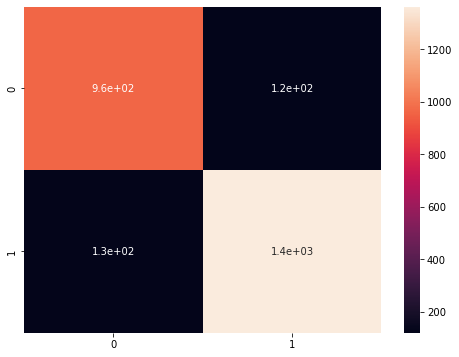

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(cm , annot = True)

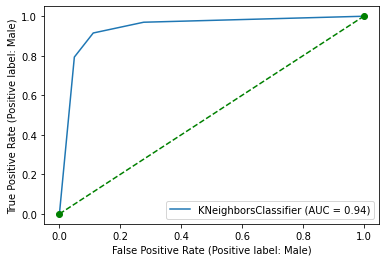

In [35]:
plot_roc_curve(knn, xtest, ytest)
plt.plot([0,1],[0,1], 'go--')

In [38]:
def matrix_metrix(y_test,y_prediction):
   CM = confusion_matrix(y_test,y_prediction)

   TP = CM[0][0]
   TN = CM[1][1]
   FP = CM[1][0] 
   FN = CM[0][1]
   
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )         # positive predictive rate (ppv)     
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )         # false discovery rate
   TPR        = round( TP / (TP+FN),4 )         # true positive rate
   
   
   Recall     = round( TP / (TP+FN),4 )         # true positive rate
   FPR        = round( FP / (TN+FP),4 )         # false positive rate or 1-specificity
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 )         # specificity
   CSI        = round( TP / (TP+FN+FP),4 )      # threat score (TS) or crticical success index CSI
   
   
   
   F1_measure = round ( ((Precision+Recall) / 2),4)   #  F1 measure
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)    #  harmonic mean or F1 score
   
   BA         = round ( ((TPR+ TNR) / 2),4)     #balanced accuracy
   
   mat_met = pd.DataFrame({

'Metric':['TP','TN','FP','FN','Population','Prevalence','Accuracy','Precision','NPV','FDR','TPR','Recall','FPR','FNR','TNR','CSI','F1_measure','F1','BA'],     'Value':[TP,TN,FP,FN,Population,Prevalence,Accuracy,Precision,NPV,FDR,TPR,Recall,FPR,FNR,TNR,CSI,F1_measure,F1,BA]})
   return (mat_met)

In [39]:
mat_met =matrix_metrix(ytest,y_prediction)
print (mat_met)

        Metric      Value
0           TP   960.0000
1           TN  1361.0000
2           FP   126.0000
3           FN   120.0000
4   Population  2567.0000
5   Prevalence     0.4200
6     Accuracy     0.9042
7    Precision     0.8840
8          NPV     0.9190
9          FDR     0.1160
10         TPR     0.8889
11      Recall     0.8889
12         FPR     0.0847
13         FNR     0.1111
14         TNR     0.9153
15         CSI     0.7960
16  F1_measure     0.8864
17          F1     0.8864
18          BA     0.9021
